In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import RobustScaler,LabelEncoder

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/manish0222/TE_SEM_6/main/ds_lab/ASGN1/melb_data_1.csv")
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [49]:
df.shape

(13580, 21)

In [50]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [51]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [52]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [53]:
null_col= df.columns[df.isnull().any()].tolist()
num_col =df.select_dtypes(include=np.number).columns.tolist()
num_col

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [54]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [55]:
df.astype({'Landsize':int})
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [56]:
df[num_col]=df[num_col].fillna(df[num_col].mean())
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [57]:
df=df.ffill()
df=df.bfill()
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [58]:
df['Rooms'].unique()

array([ 2,  3,  4,  1,  6,  5,  8,  7, 10], dtype=int64)

In [59]:
df['Rooms'].replace(
    [ 2,  3,  4,  1,  6,  5,  8,  7, 10],[ '2bhk',  '3bhk',  '4bhk',  '1bhk',  '6bhk',  '5bhk',  '8bhk',  '7bhk', '10bhk'],inplace=True)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2bhk,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2bhk,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3bhk,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3bhk,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4bhk,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4bhk,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,151.96765,1981.000000,Maribyrnong,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3bhk,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.00000,1995.000000,Maribyrnong,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3bhk,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,151.96765,1997.000000,Maribyrnong,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4bhk,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.00000,1920.000000,Maribyrnong,-37.85908,144.89299,Western Metropolitan,6380.0


In [62]:
label_encoder=LabelEncoder()
df['Rooms']=label_encoder.fit_transform(df['Rooms'])
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,151.96765,1981.000000,Maribyrnong,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.00000,1995.000000,Maribyrnong,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,151.96765,1997.000000,Maribyrnong,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.00000,1920.000000,Maribyrnong,-37.85908,144.89299,Western Metropolitan,6380.0


In [63]:
df_encoded=pd.get_dummies(df,columns=['Rooms'],prefix='Rooms')
df_encoded

,Suburb,Address,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Propertycount,Rooms_0,Rooms_1,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8
0,Abbotsford,85 Turner St,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,...,4019.0,0,0,1,0,0,0,0,0,0
1,Abbotsford,25 Bloomburg St,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,4019.0,0,0,1,0,0,0,0,0,0
2,Abbotsford,5 Charles St,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,4019.0,0,0,0,1,0,0,0,0,0
3,Abbotsford,40 Federation La,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,...,4019.0,0,0,0,1,0,0,0,0,0
4,Abbotsford,55a Park St,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,4019.0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,...,7392.0,0,0,0,0,1,0,0,0,0
13576,Williamstown,77 Merrett Dr,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,...,6380.0,0,0,0,1,0,0,0,0,0
13577,Williamstown,83 Power St,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,...,6380.0,0,0,0,1,0,0,0,0,0
13578,Williamstown,96 Verdon St,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,...,6380.0,0,0,0,0,1,0,0,0,0


In [65]:
df_encoded.drop(['Type'],axis=1,inplace=True)
df_encoded

,Suburb,Address,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Propertycount,Rooms_0,Rooms_1,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8
0,Abbotsford,85 Turner St,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,...,4019.0,0,0,1,0,0,0,0,0,0
1,Abbotsford,25 Bloomburg St,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,...,4019.0,0,0,1,0,0,0,0,0,0
2,Abbotsford,5 Charles St,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,...,4019.0,0,0,0,1,0,0,0,0,0
3,Abbotsford,40 Federation La,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,...,4019.0,0,0,0,1,0,0,0,0,0
4,Abbotsford,55a Park St,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,...,4019.0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,...,7392.0,0,0,0,0,1,0,0,0,0
13576,Williamstown,77 Merrett Dr,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,...,6380.0,0,0,0,1,0,0,0,0,0
13577,Williamstown,83 Power St,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,...,6380.0,0,0,0,1,0,0,0,0,0
13578,Williamstown,96 Verdon St,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,...,6380.0,0,0,0,0,1,0,0,0,0


In [74]:
arr=np.array(df['Rooms'])
arr=set(arr)
arr1=[x for x in arr]
arr=arr1
arr
n=len(arr)
mean=sum(arr)/n
median=0
if n%2==0:
    median=sum(arr[n//2-1]+arr[n//2])/2
else:
    median = arr[n//2]
    
median={}
for i in arr:
    if i not in median:
        median[i]=1
    else:
        median[i]+=1

med=max(median,keys=median.get)

var =  sum((x-mean)**2 for x in arr)/n
std=var**0.5


[0, 1, 2, 3, 4, 5, 6, 7, 8]

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

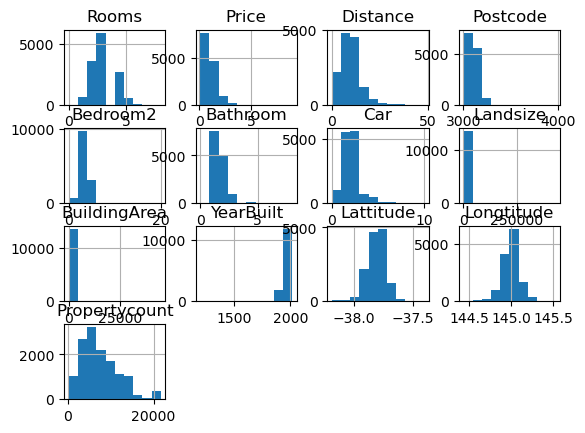

In [75]:
df.hist()

old skew 1.0693393485759513
old skew 0.58429797718773
old skew 0.5402558452428445


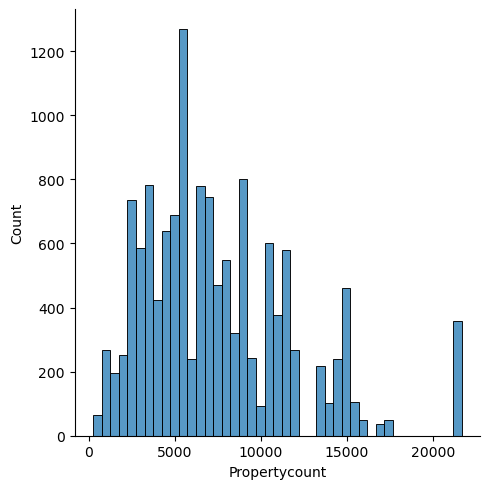

In [83]:
q1=df['Propertycount'].quantile(0.25)
q3=df['Propertycount'].quantile(0.75)
iqr=q3-q1
print(f"old skew {df['Propertycount'].skew()}")
up=q3+1.5*iqr
low=q1-1.5*iqr
df_fil=df[(df['Propertycount']<up) & (df['Propertycount']>low)]
print(f"old skew {df_fil['Propertycount'].skew()}")
sns.displot(df['Propertycount'])
q1=df_fil['Propertycount'].quantile(0.25)
q3=df_fil['Propertycount'].quantile(0.75)
iqr=q3-q1
up=q3+1.5*iqr
low=q1-1.5*iqr
df_fil=df_fil[(df_fil['Propertycount']<up) & (df_fil['Propertycount']>low)]
print(f"old skew {df_fil['Propertycount'].skew()}")

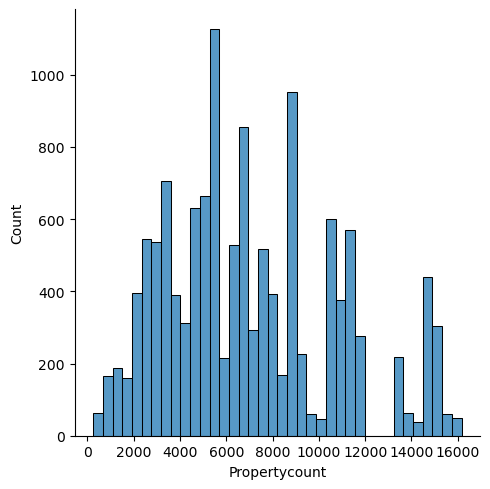

In [84]:
sns.displot(df_fil['Propertycount'])

In [86]:
z_score=stats.zscore(df_fil['Propertycount'])
print(f"old skew {df_fil['Propertycount'].skew()}")
df_new = df_fil[abs(z_score)<3]
print(f"old skew {df_new['Propertycount'].skew()}")

old skew 0.5402558452428445
old skew 0.5402558452428445


In [87]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
df['Rooms']=scaler.fit_transform(df['Rooms'].values.reshape(-1,1))
df['Rooms']

0        0.250
1        0.250
2        0.375
3        0.375
4        0.500
         ...  
13575    0.500
13576    0.375
13577    0.375
13578    0.500
13579    0.500
Name: Rooms, Length: 13580, dtype: float64